In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

import json

import sys
import os
sys.path.append(os.path.abspath('../src/'))
from data_process_func import parce_mess, \
                              parce_side, \
                              parce_date, \
                              parce_time, \
                              parce_pick, \
                              parce_drop, \
                              parce_pax

#matplotlib
import matplotlib.pyplot as plt
#Bukit Timah'

In [49]:
font = {'family' : 'serif',
    'sans-serif' : 'Georgia'}
        #'weight' : 'bold'}
# Set the global font to be DejaVu Sans, size 10 (or any other sans-serif font of your choice!)
# plt.rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':10})
plt.rc('font', **font)
plt.rcParams["figure.figsize"] = (16,8)

S = 28
M = 28
B = 28

lw =5

plt.rc('font', size      = S)          # controls default text sizes
plt.rc('axes', titlesize = B)     # fontsize of the axes title
plt.rc('axes', labelsize = M)    # fontsize of the x and y labels
plt.rc('xtick', labelsize= S)    # fontsize of the tick labels
plt.rc('ytick', labelsize= S)    # fontsize of the tick labels
plt.rc('legend', fontsize= M)    # legend fontsize
plt.rc('figure', titlesize=B)  # fontsize of the figure title

# Plot charts

plot = {'linewidth': 6}

# Colors

C1 = '#1B619B' # blue
C2 = '#60646C' # grey
C3 = '#ACCBE0' # light blue
C4 = '#2BBBD8' # sea
C5 = '#F78D3F' # orange
C6 = '#FFCC33' # yellow
C7 = '#E9DCB9' # light yellow

dash = '--'

# legend locations
ul = 'upper left'
ur = 'upper right'

# Bar charts

bar = {"width":0.6}

# plot layout

plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0

# grid

plt.rcParams['grid.color'] = 'k'
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['grid.linewidth'] = 0.5

In [3]:
act_mess_df = pd.read_hdf('../data/SGHitch_msg.HDF5', key = 'random_key')

In [4]:
# Sampling parameters
W = '15T' # Window to get rid of same messages reposting

In [5]:
act_mess_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 71421 entries, 2019-10-12 16:00:55+00:00 to 2019-11-11 00:10:41+00:00
Data columns (total 11 columns):
user_id     71421 non-null int64
username    53239 non-null object
message     71421 non-null object
fl          71421 non-null int64
m_date      68002 non-null object
time        69205 non-null object
pick        69382 non-null object
drop        68445 non-null object
pax         66660 non-null object
dist        54353 non-null float64
drop_d      50465 non-null float64
dtypes: float64(2), int64(2), object(7)
memory usage: 6.5+ MB


In [6]:
act_mess_df.head()

,user_id,username,message,fl,m_date,time,pick,drop,pax,dist,drop_d
date,,,,,,,,,,,
2019-10-12 16:00:55+00:00,360992588,cssksskyy,👋 Hitcher looking for Driver\n\nPick Up: Bugis...,0,today,before 12.30am,bugis plus,bedok,2,7.0,16.0
2019-10-12 16:01:02+00:00,40672545,jacindakyt,👋🏼Hitcher looking for drivers.\n\nPick up: MBS...,0,today,now,mbs,sembawang,3,1.0,27.0
2019-10-12 16:01:09+00:00,152253888,NaN,🚗 Driver looking for hitcher \nPick up : CCK\n...,1,today,NaN,cck,anywhere,1-3,23.0,NaN
2019-10-12 16:01:14+00:00,47916066,SiangFong,👋 Hitcher looking for Driver\nPick up: Bar ro...,0,today,now,bar room siglap,pioneer hall 18d,1,15.0,NaN
2019-10-12 16:01:41+00:00,38032084,etheltasha,👋🏻 Hitcher looking for driver\nPick up: cq\nDr...,0,today,now,cq,owen road,1,NaN,NaN


In [7]:
act_mess_df.tail()

,user_id,username,message,fl,m_date,time,pick,drop,pax,dist,drop_d
date,,,,,,,,,,,
2019-11-11 00:08:39+00:00,914446298,BoyZul82,👋🏻 Hitcher looking for Driver \nPick Up: 33 Be...,0,today,now,33 bendemeer road,10 bulim ave,1,NaN,NaN
2019-11-11 00:08:43+00:00,34229603,imannudin,👋 Hitcher looking for Driver\nPick Up: Macpher...,0,today,now,macpherson,cdc,1,13.0,NaN
2019-11-11 00:08:58+00:00,416208888,NaN,🚗 Driver looking for hitchers 😁\n\nPick up: To...,1,mon to fri,9am-915am daily,toa payoh area,robinson road or nearby,1-2,12.0,NaN
2019-11-11 00:10:40+00:00,205087063,natashaaasam,👋🏻 Hitcher looking for driver\nPick up: Pasir ...,0,today,now,pasir ris,jurong,1,18.0,22.0
2019-11-11 00:10:41+00:00,290272389,Ji4ax,👋🏻 Hitcher looking for driver\nPick up: teckwh...,0,today,now,teckwhye,bedok north,1,NaN,16.0


In [8]:
# act_mess_df['pick'][act_mess_df['fl']==0].value_counts()

### Creating `to_dist`

In [9]:
# map = json.load(open('../src/distr_map.json'))
# to_distr = {}
# for key, val in map.items():
#     for w in val:
#         to_distr[w.lower()] = int(key)
# json.dump(to_distr,open('../src/mess_to_distr.json',"w"))

---------------------------------------------------------------

In [10]:
# to_distr

In [11]:
act_mess_df['pick'][(act_mess_df['fl']==0)].count()

52417

In [12]:
act_mess_df['pick'][(act_mess_df['fl']==0) & (act_mess_df['dist'].isnull())
                   ].value_counts()

cq                                     72
tanah merah                            70
pioneer                                64
lakeside                               49
jalan besar                            49
nsrcc                                  49
nyp                                    46
aljunied                               45
commonwealth                           44
singapore poly                         44
town                                   43
westgate                               43
harbourfront                           42
18 bali lane                           41
dhoby ghaut                            41
fernvale                               41
telok ayer                             41
bukit merah                            40
sumang lane                            40
marymount                              40
one min                                38
lorong ah soo                          38
whampoa                                38
compass one                       

In [13]:
# to_distr

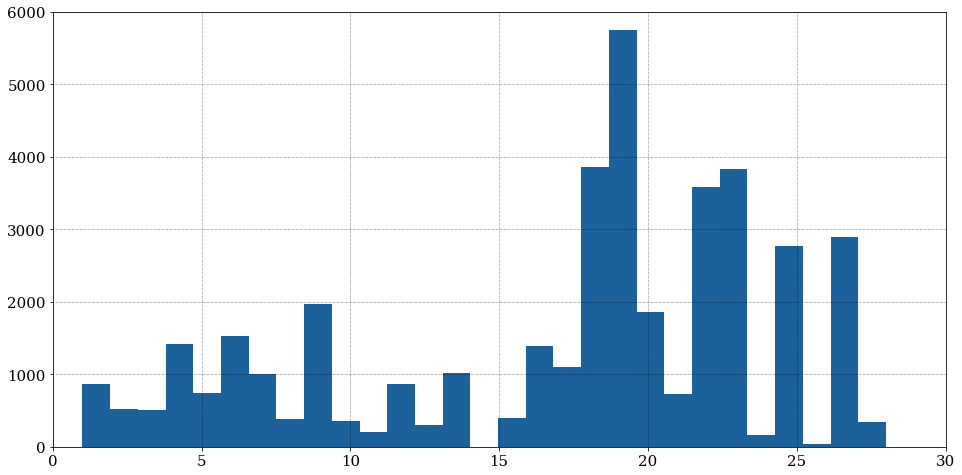

In [14]:
act_mess_df['dist'][(act_mess_df['fl']==0) & (act_mess_df['dist'].notnull())].hist(bins=29,color = C1);

In [15]:
# act_mess_df['date'] = pd.to_datetime(act_mess_df['date'])
act_mess_df.index.date

array([datetime.date(2019, 10, 12), datetime.date(2019, 10, 12),
       datetime.date(2019, 10, 12), ..., datetime.date(2019, 11, 11),
       datetime.date(2019, 11, 11), datetime.date(2019, 11, 11)],
      dtype=object)

In [16]:
hourly_df = act_mess_df[['dist','user_id','username']][(act_mess_df['fl']==0) & (act_mess_df['dist'] == 1)].copy()
hourly_df['count'] = hourly_df['user_id'].rolling(W).apply(
                     lambda x: np.sum(x == x[-1])==1)
hourly_df = hourly_df.resample('H').sum()
hourly_df['1'] = hourly_df['count']
hourly_df = hourly_df.drop(['dist','user_id','count'],axis=1)
for i in range(2,29):
    tmp = act_mess_df[['user_id']][(act_mess_df['fl']==0) & (act_mess_df['dist'] == i)].copy()
    tmp['count'] = tmp['user_id'].rolling(W).apply(
                     lambda x: np.sum(x == x[-1])==1)

    tmp = tmp.resample('H').sum()
    hourly_df[str(i)] = tmp['count']

/home/egor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  This is separate from the ipykernel package so we can avoid doing imports until
/home/egor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  # Remove the CWD from sys.path while we load stuff.


In [17]:
# Getting rid of same messages reposting

hourly_df

,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
date,,,,,,,,,,,,,,,,,,,,,
2019-10-12 16:00:00+00:00,3.0,2.0,NaN,5.0,1.0,3.0,2.0,1.0,8.0,2.0,...,2.0,2.0,2.0,7.0,8.0,NaN,2.0,NaN,7.0,1.0
2019-10-12 17:00:00+00:00,3.0,2.0,NaN,21.0,0.0,3.0,2.0,0.0,5.0,4.0,...,7.0,7.0,1.0,4.0,2.0,NaN,1.0,NaN,5.0,0.0
2019-10-12 18:00:00+00:00,5.0,0.0,2.0,26.0,0.0,4.0,5.0,1.0,5.0,2.0,...,6.0,5.0,0.0,3.0,9.0,NaN,3.0,NaN,2.0,1.0
2019-10-12 19:00:00+00:00,2.0,2.0,2.0,10.0,0.0,6.0,2.0,1.0,6.0,0.0,...,2.0,0.0,2.0,1.0,1.0,NaN,2.0,NaN,4.0,0.0
2019-10-12 20:00:00+00:00,3.0,1.0,0.0,1.0,1.0,21.0,0.0,1.0,5.0,0.0,...,3.0,1.0,0.0,2.0,2.0,NaN,0.0,NaN,4.0,0.0
2019-10-12 21:00:00+00:00,3.0,0.0,0.0,0.0,0.0,3.0,1.0,3.0,10.0,0.0,...,3.0,0.0,0.0,0.0,1.0,NaN,0.0,NaN,2.0,0.0
2019-10-12 22:00:00+00:00,2.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,4.0,0.0,...,3.0,1.0,0.0,0.0,1.0,NaN,1.0,NaN,2.0,1.0
2019-10-12 23:00:00+00:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,3.0,NaN,1.0,NaN,2.0,0.0
2019-10-13 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,4.0,1.0,1.0,3.0,5.0,NaN,2.0,NaN,2.0,0.0


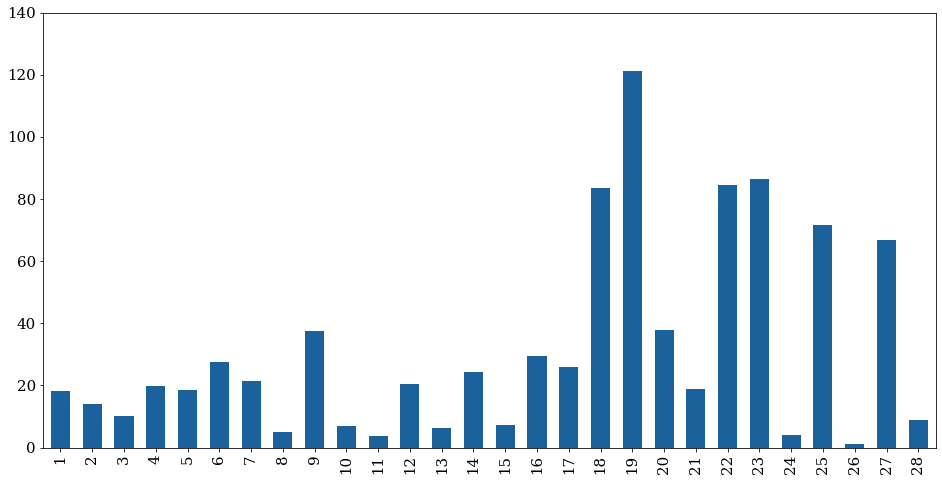

In [18]:
hourly_df.fillna(0)
hourly_df = hourly_df.resample('D').sum()
hourly_df[hourly_df.index.dayofweek < 5].mean().plot.bar(**bar, color = C1);
# hourly_df[hourly_df.index.dayofweek >= 5].mean().plot.bar()
plt.savefig('../img/avg_pax_per_weekday.png')

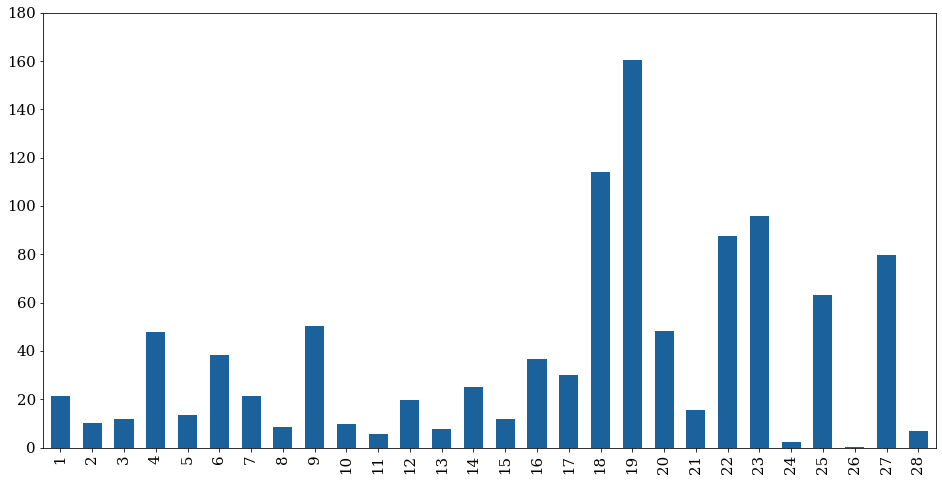

In [19]:
hourly_df[hourly_df.index.dayofweek >= 5].mean().plot.bar(**bar, color = C1);
plt.savefig('../img/avg_pax_per_weekend.png')

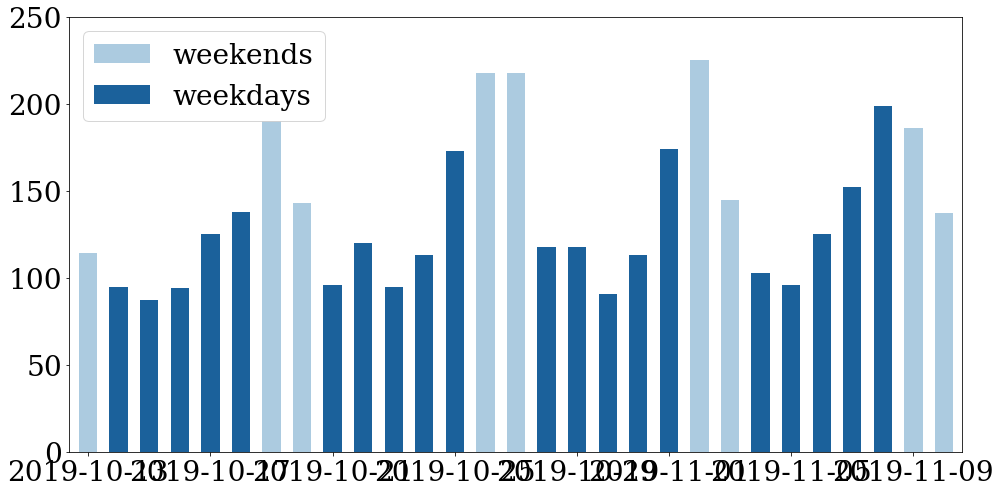

In [55]:
left = '2019-10-12 09:00:00+00:00'
right = '2019-11-10 14:00:00+00:00'

fig, ax = plt.subplots()

ax.bar(hourly_df.index.date,hourly_df['19'][hourly_df.index.dayofweek < 7], color = C3, \
        label = 'weekends', **bar)
ax.bar(hourly_df['19'][hourly_df.index.dayofweek < 5].index.date, \
       hourly_df['19'][hourly_df.index.dayofweek < 5], color = C1, label = 'weekdays', **bar);
ax.legend();
ax.set_xbound(left,right)
plt.savefig('../img/dist19_avg_pax_per_day.png');

In [21]:
d19 = act_mess_df[['dist','username']][(act_mess_df['fl']==0) & (act_mess_df['dist'] == 19)].copy()
# d19['date'] = pd.to_datetime(d19['date'])
d19 = d19.resample('H').count()
d19['DoW'] = d19.index.dayofweek

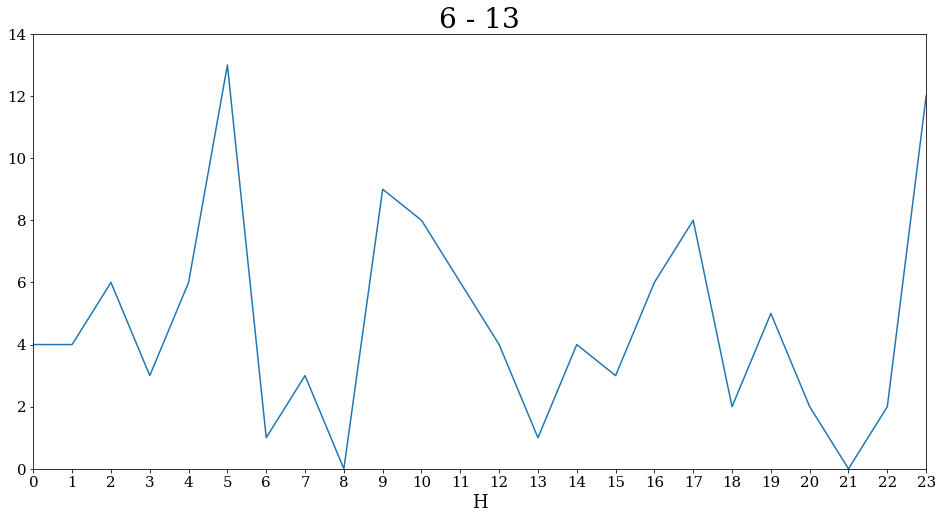

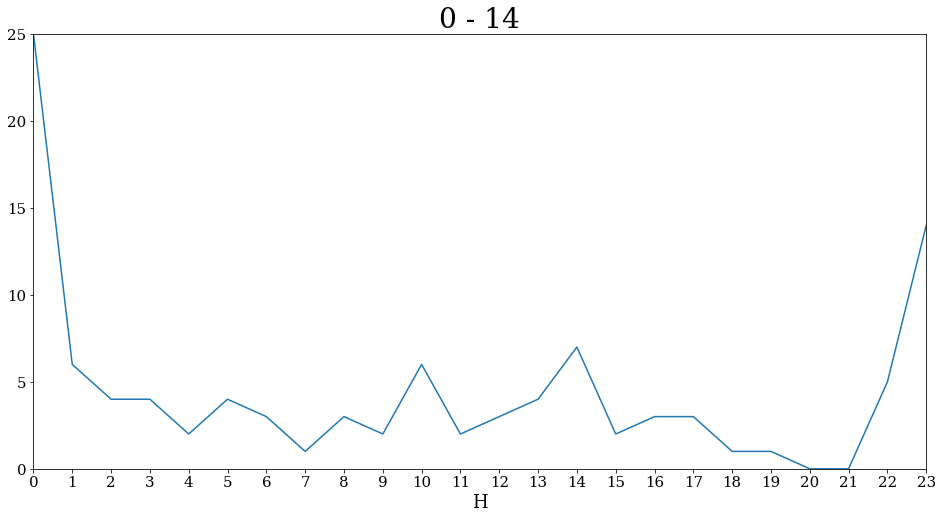

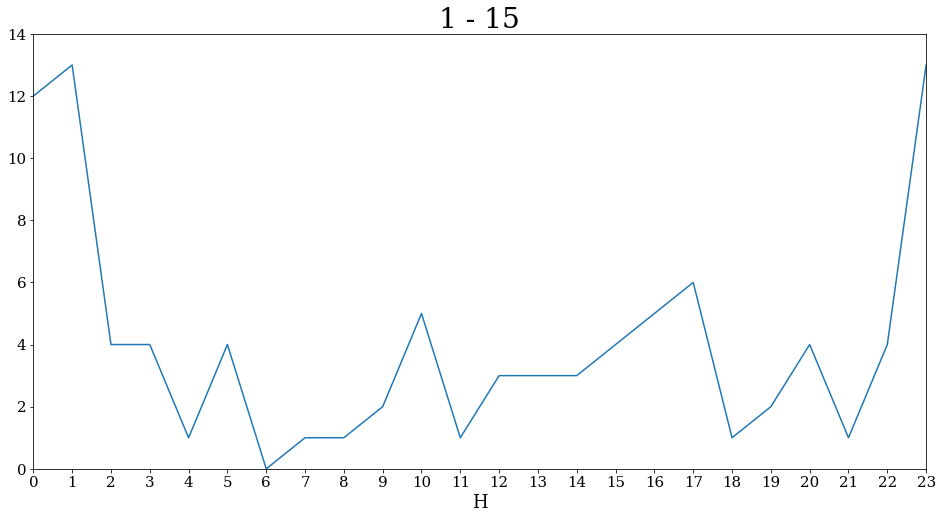

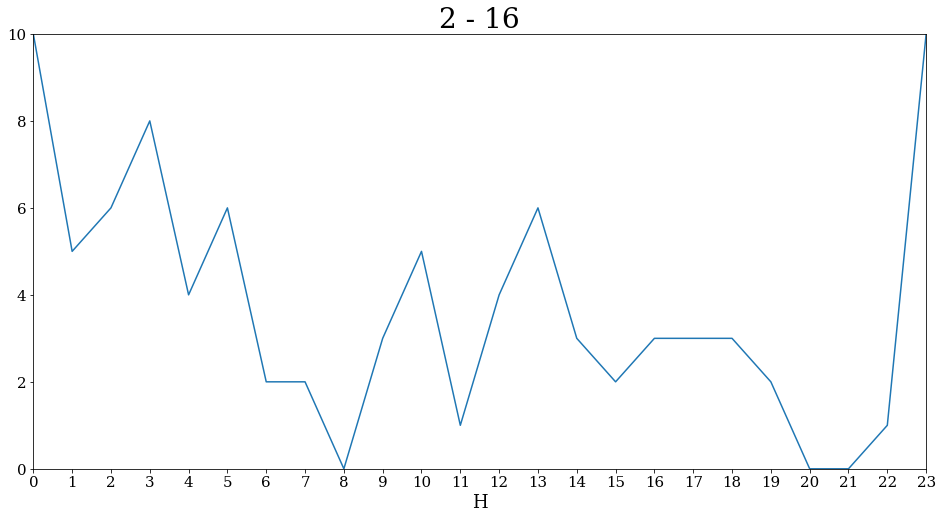

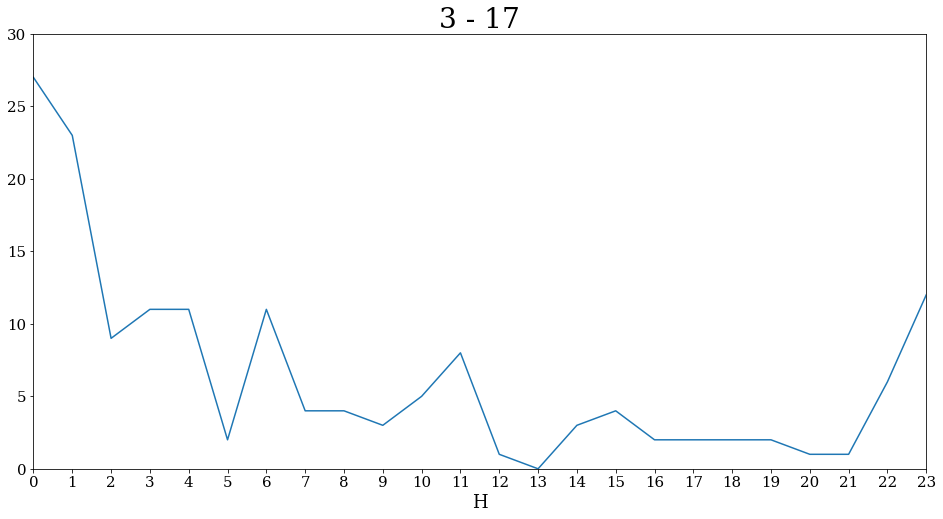

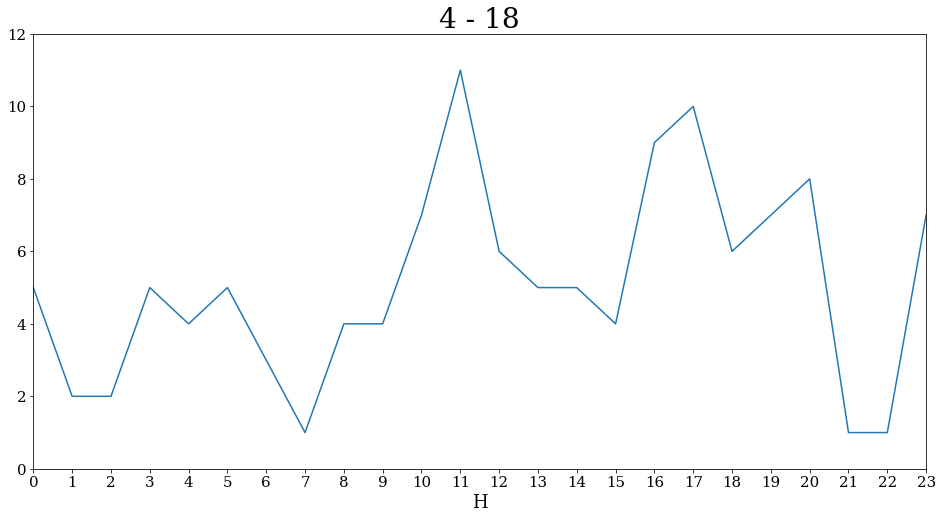

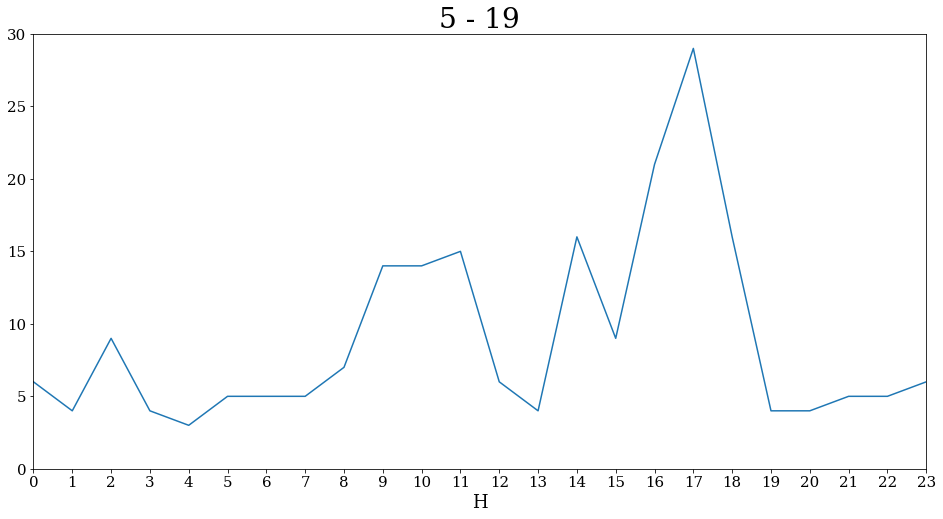

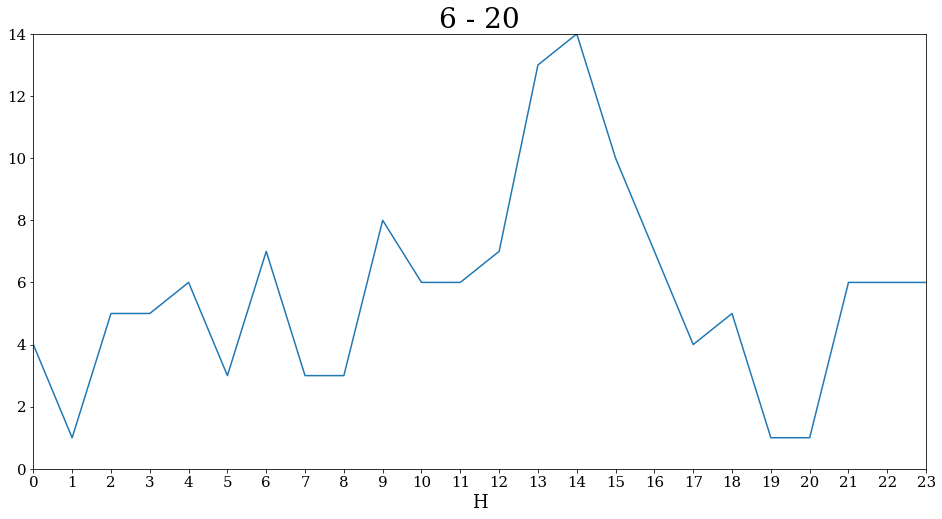

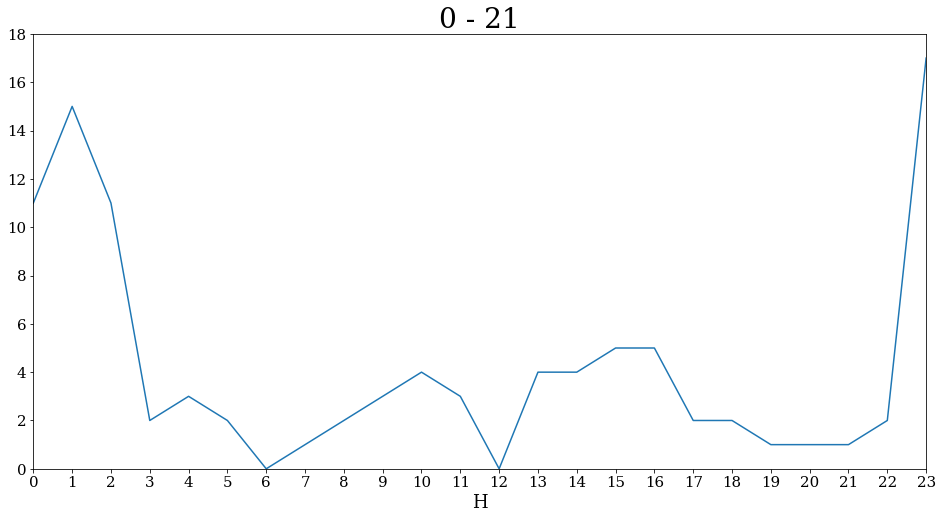

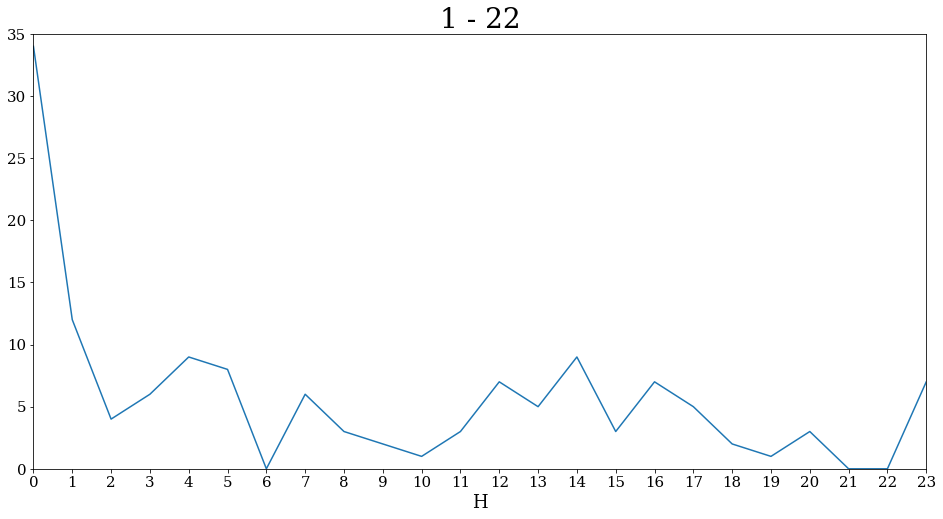

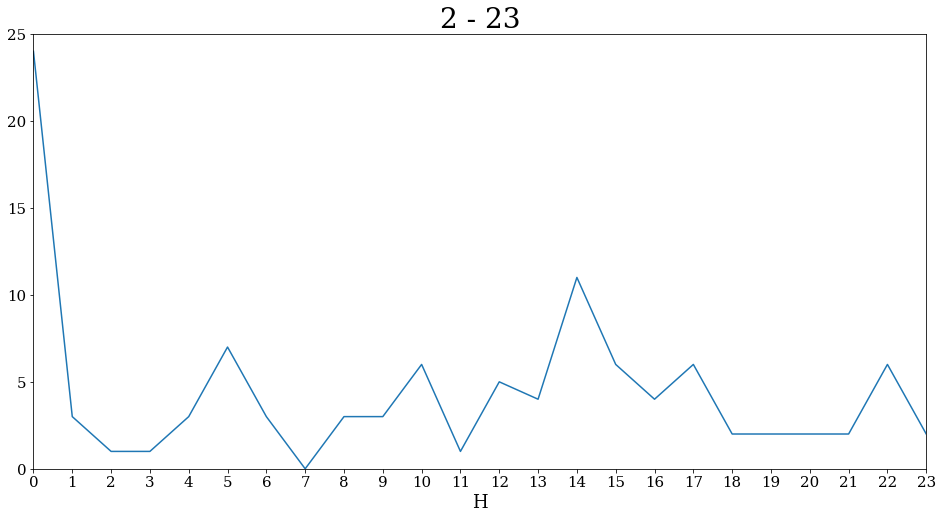

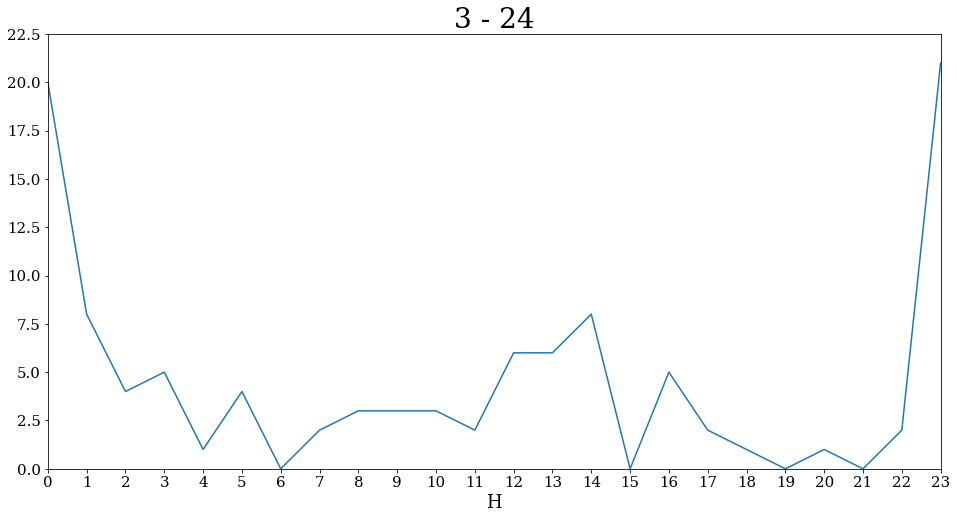

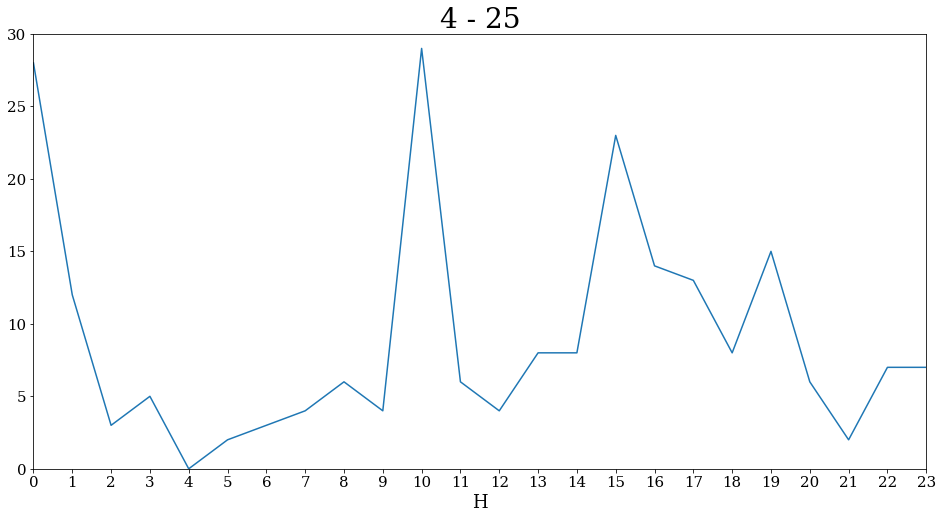

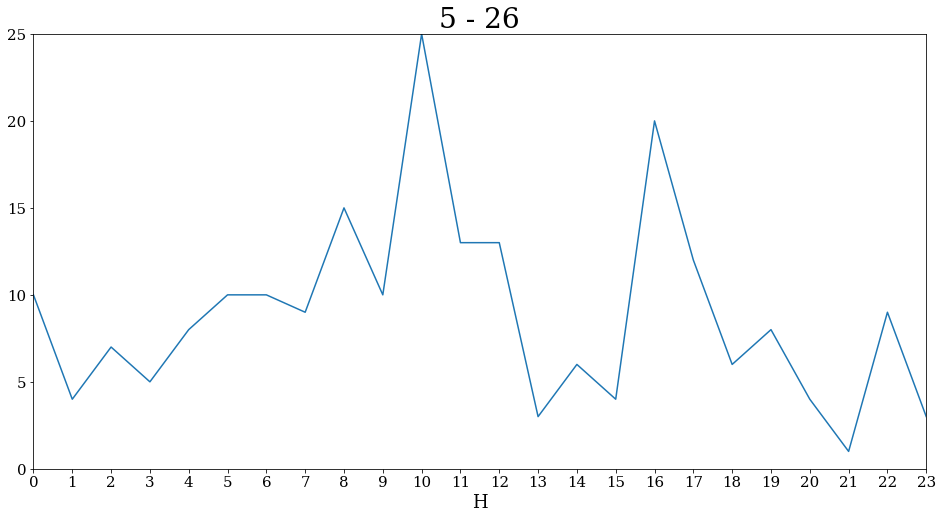

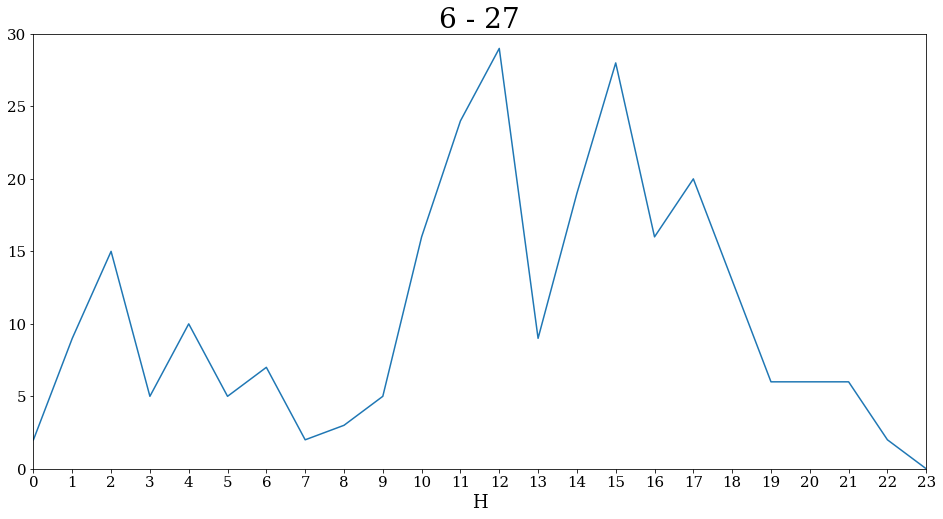

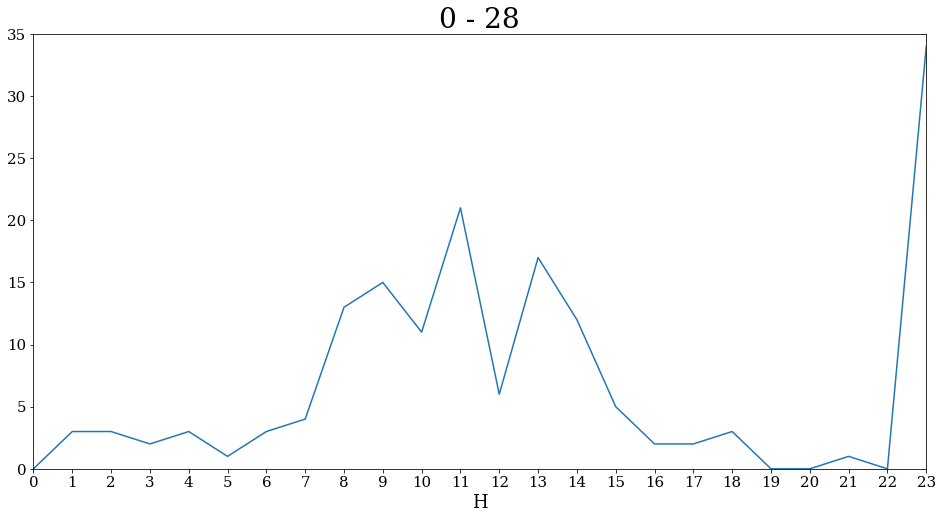

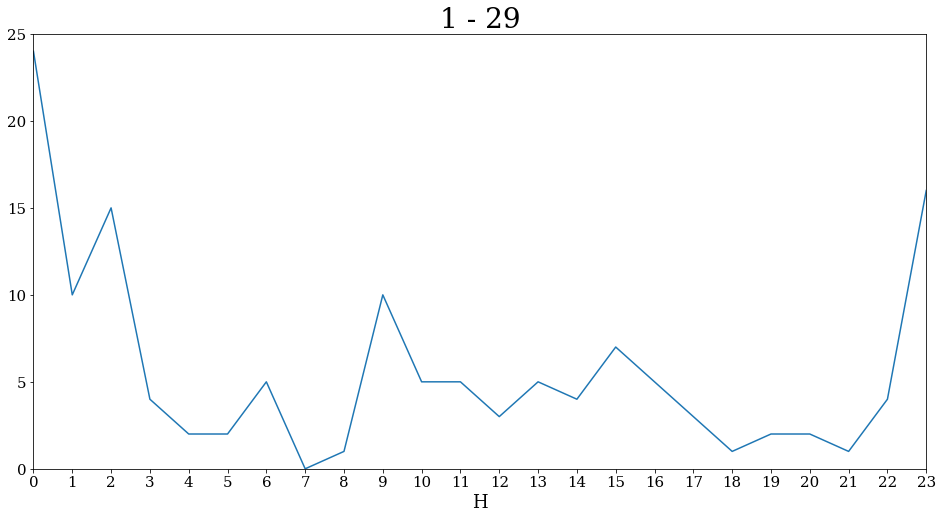

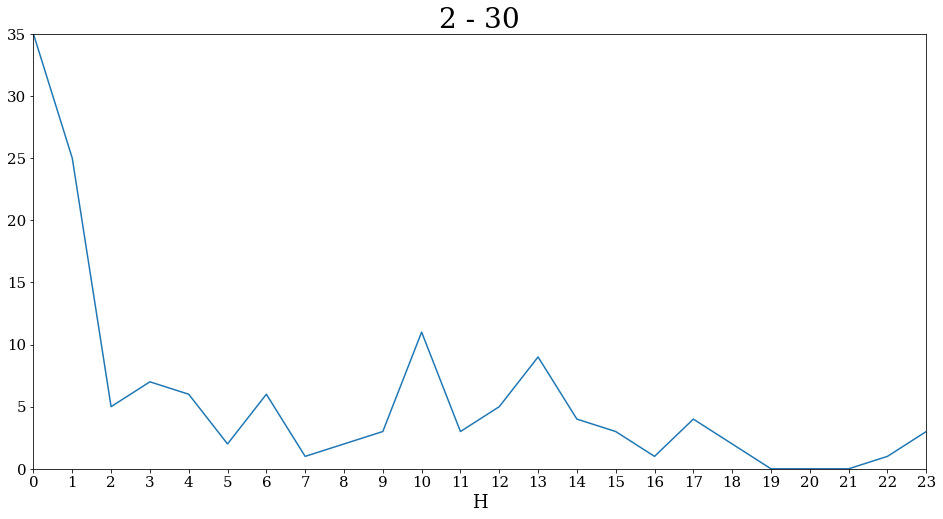

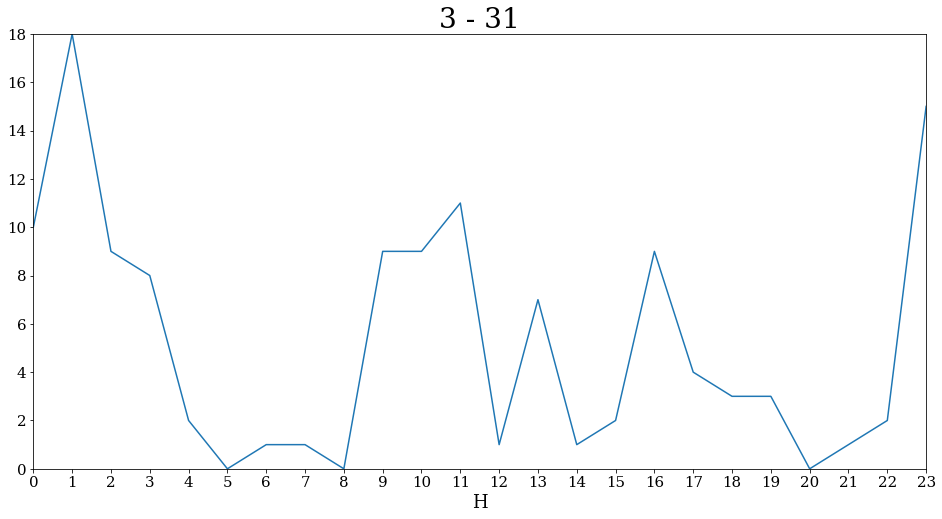

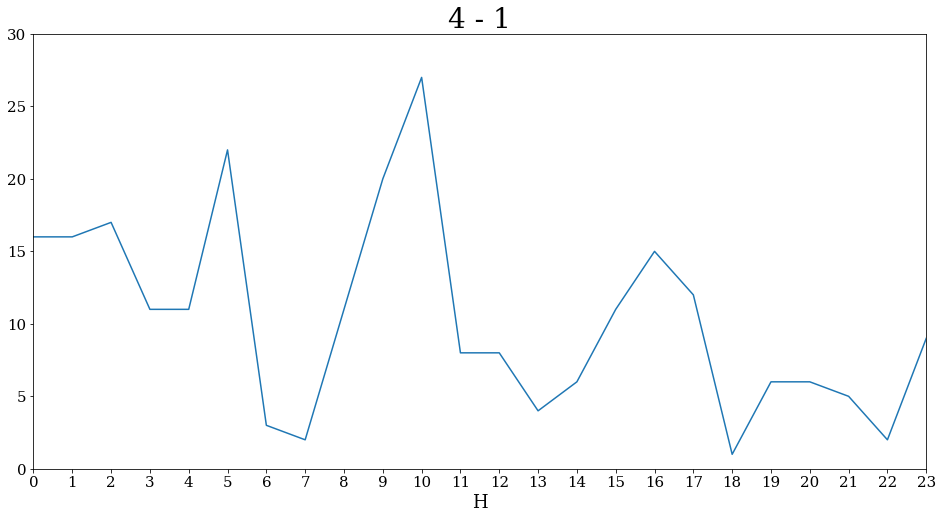

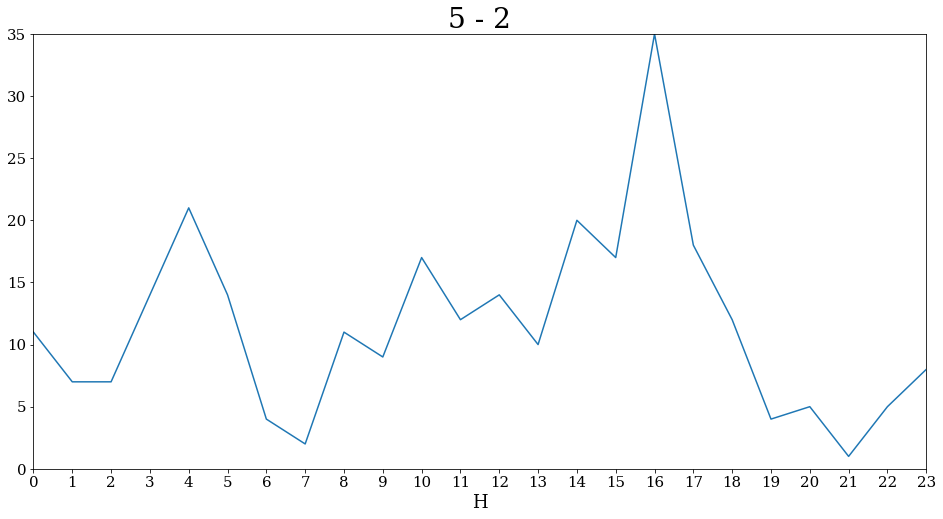

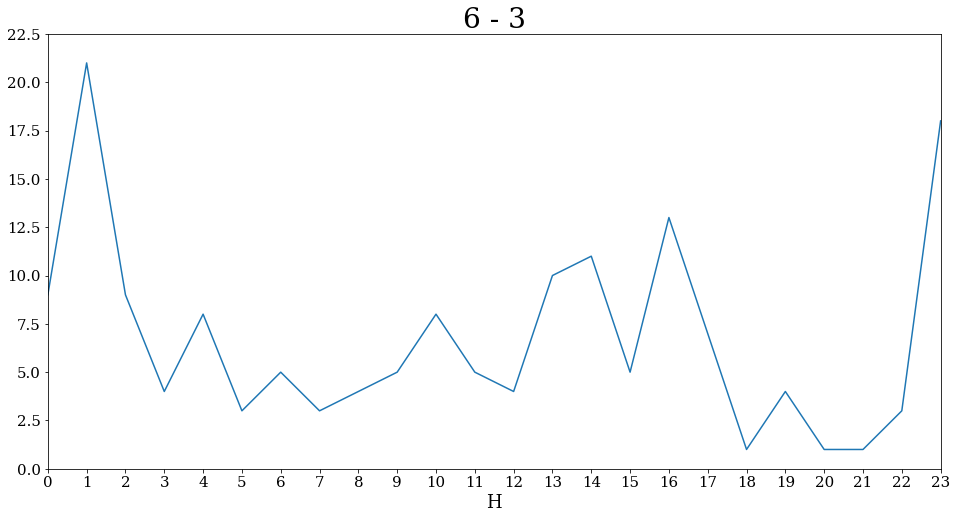

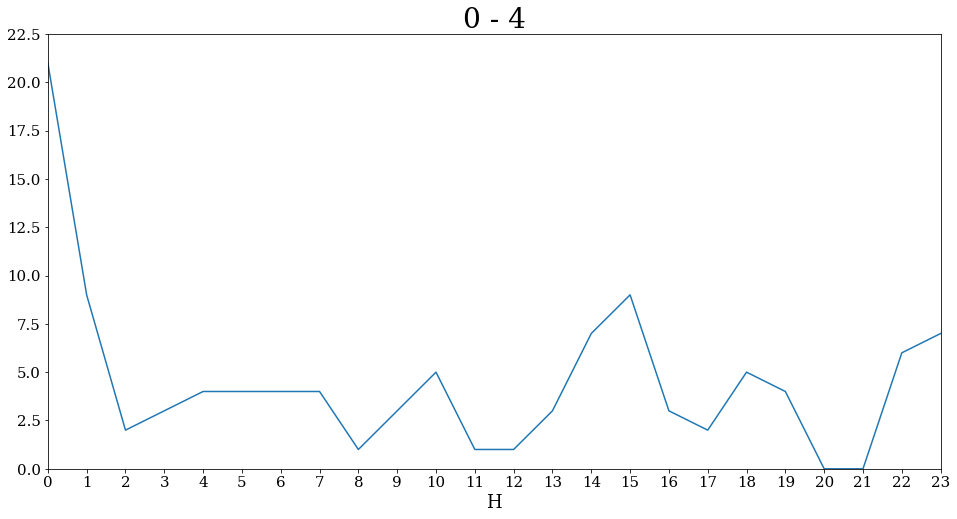

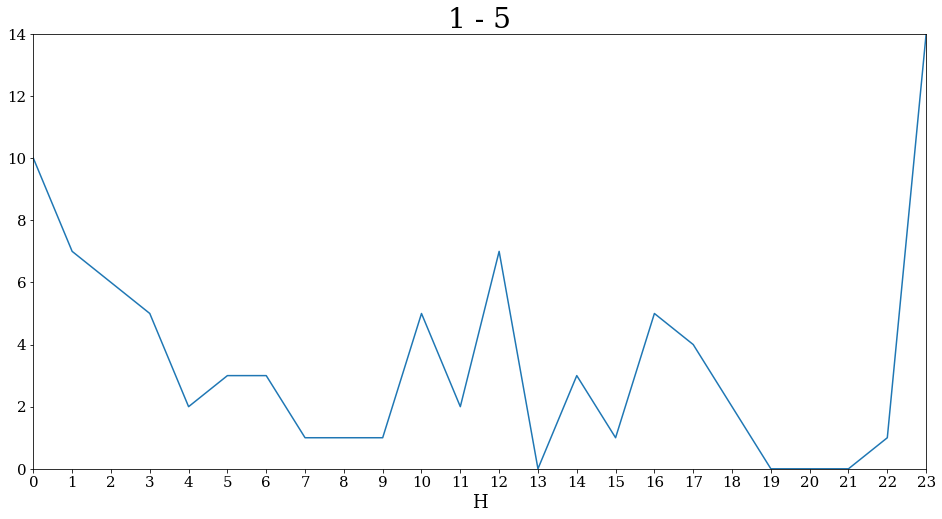

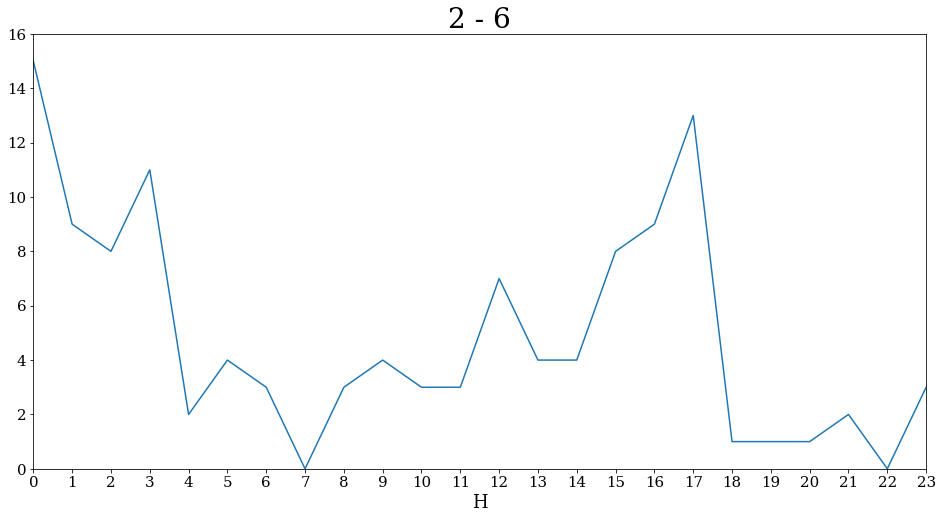

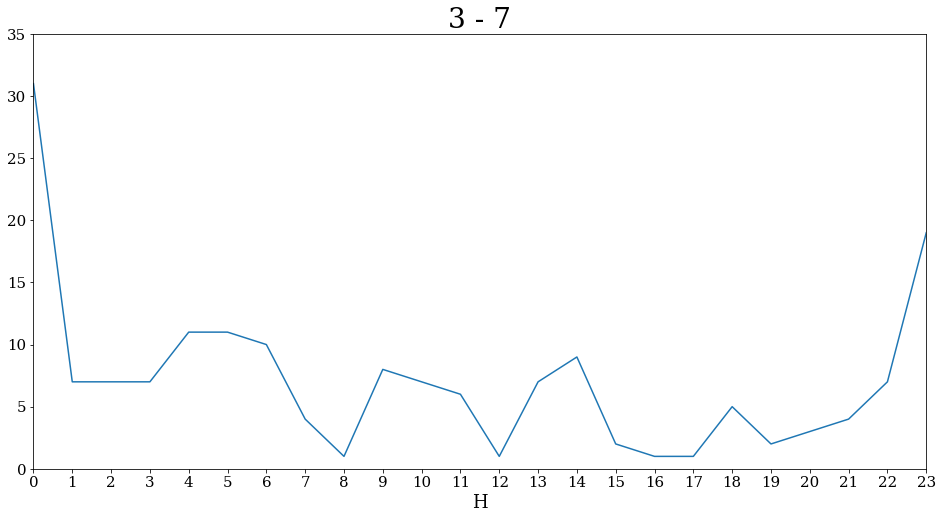

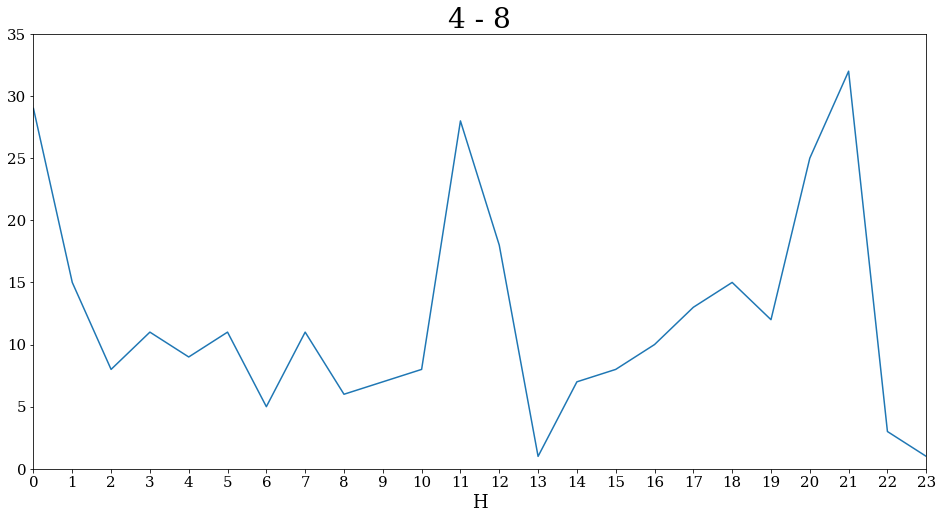

In [22]:
d19['H'] = d19.index.hour
for i in range(13,32):
    start = f'2019-10-{i} 00:00:00'
    end = f'2019-10-{i} 23:00:00'
    temp = d19[start:end]
    temp.set_index('H')['username'].plot()
    plt.title(str(temp.index.dayofweek[0])+" - "+str(temp.index.day[0]))
    plt.xticks(range(24))
    plt.show();
for i in range(1,9):
    start = f'2019-11-{i} 00:00:00'
    end = f'2019-11-{i} 23:00:00'
    temp = d19[start:end]
    temp.set_index('H')['username'].plot()
    plt.title(str(temp.index.dayofweek[0])+" - "+str(temp.index.day[0]))
    plt.xticks(range(24))
    plt.show();

In [23]:
# d19.set_index('H')['username'].plot()

In [24]:
hourly = act_mess_df[['dist','username']][(act_mess_df['fl']==0) & (act_mess_df['dist'] == 1)].copy()
# hourly['date'] = pd.to_datetime(hourly['date'])
# hourly = hourly.set_index('date')
hourly = hourly.resample('H').count()
hourly['1'] = hourly['username']
hourly = hourly.drop(['dist','username'],axis=1)
for i in range(2,29):
    tmp = act_mess_df[['username']][(act_mess_df['fl']==0) & (act_mess_df['dist'] == i)].copy()
#     tmp = tmp.set_index('date')
    tmp = tmp.resample('H').count()
    hourly[str(i)] = tmp['username']

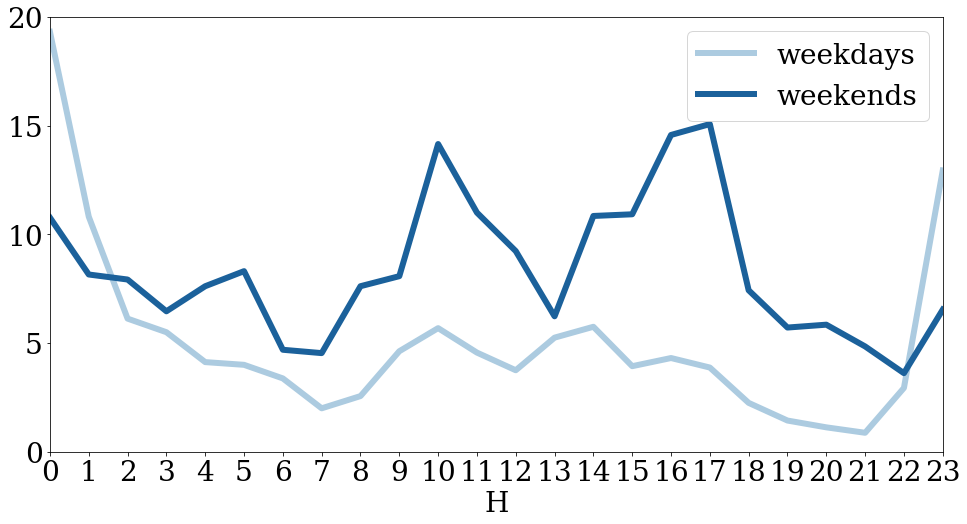

In [51]:
hourly.fillna(0)
hourly['H'] = hourly.index.hour
hourly = hourly.fillna(0)
hourly[hourly.index.dayofweek < 4].set_index('H')['19'
      ].groupby('H').mean().plot(color=C3, label = 'weekdays', **plot)
hourly[hourly.index.dayofweek > 3].set_index('H')['19'
      ].groupby('H').mean().plot(color=C1, label = 'weekends', **plot)
plt.xticks(range(24))
plt.legend()
# plt.savefig('../img/dist19_intraday.png');

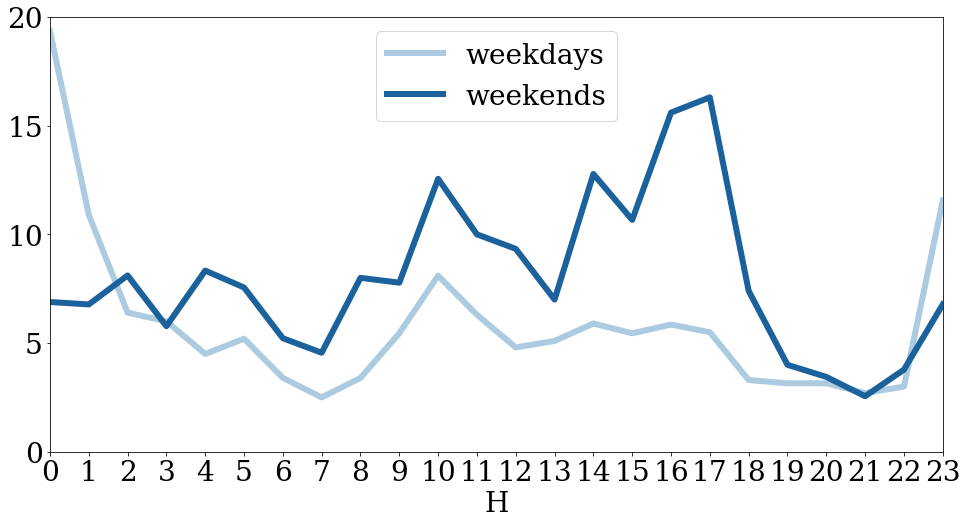

In [52]:
hourly.fillna(0)
hourly['H'] = hourly.index.hour
hourly = hourly.fillna(0)
hourly[hourly.index.dayofweek < 5].set_index('H')['19'
      ].groupby('H').mean().plot(color=C3, label = 'weekdays', **plot)
hourly[hourly.index.dayofweek > 4].set_index('H')['19'
      ].groupby('H').mean().plot(color=C1, label = 'weekends', **plot)
plt.xticks(range(24))
plt.yticks(range(0,21,5))
plt.legend()
plt.savefig('../img/dist19_intraday.png');